## Application 4
### Exercices Neo4j

1. How many actors played in more than 2 movie ? Get their names and year they were born.


In [15]:
import py2neo
import seaborn as sns

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="movie")  


In [25]:
query = """ MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH a, count(m) as num_movies
WHERE num_movies > 2
RETURN a.name, a.born """

results = graph.run(query).to_data_frame()
print(len(results), "actors played in more than 2 movies")
names = results['a.name']
born = results['a.born']
for i in range(len(results)):
    print(names[i], born[i])

15 actors played in more than 2 movies
Hugo Weaving 1960
Laurence Fishburne 1961
Carrie-Anne Moss 1967
Keanu Reeves 1964
Cuba Gooding Jr. 1968
Kevin Bacon 1958
Jack Nicholson 1937
Tom Cruise 1962
Meg Ryan 1961
Helen Hunt 1963
Robin Williams 1951
Tom Hanks 1956
Gene Hackman 1930
Ben Miles 1967
Bill Paxton 1955


2. In how many movies did Tom hanks play ?


In [26]:
query = """ MATCH (a:Person {name: 'Tom Hanks'})-[:ACTED_IN]->(m:Movie)
RETURN count(m) """

results = graph.run(query).to_data_frame()
print("Tom Hanks played in", results['count(m)'][0], "movies")

Tom Hanks played in 12 movies


3. In average in how many movies do actors play in ?


In [27]:
query = """ MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH a, count(m) as num_movies
RETURN avg(num_movies) """

results = graph.run(query).to_data_frame()
print("In average actors play in", results['avg(num_movies)'][0], "movies")

In average actors play in 1.6862745098039222 movies


4. In average how many actors are there in a movie ?


In [28]:
query = """ MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH m, count(a) as num_actors
RETURN avg(num_actors) """

results = graph.run(query).to_data_frame()
print("In average there are", results['avg(num_actors)'][0], "actors in a movie")

In average there are 4.526315789473684 actors in a movie


5. In average how many writers is needed to write a movie ?


In [29]:
query = """ MATCH (w:Person)-[:WROTE]->(m:Movie)
WITH m, count(w) as num_writers
RETURN avg(num_writers) """

results = graph.run(query).to_data_frame()
print("In average there are", results['avg(num_writers)'][0], "writers in a movie")

In average there are 1.25 writers in a movie


6. What is the proportion of writers that also directed the movie ?


In [34]:
query = """
MATCH (w:Person)-[:WROTE]->(m:Movie)<-[:DIRECTED]-(d:Person)
WHERE w.name = d.name
WITH m, count(w) as num_writers, count(d) as num_directors
RETURN CASE WHEN num_writers > 0 THEN toFloat(num_directors) / num_writers ELSE 0 END AS proportion
"""

result = graph.run(query).to_data_frame()
print("Proportion of writers that also directed the movie is", result['proportion'][0])


Proportion of writers that also directed the movie is 1.0


7. Do an histogram of the year of release for the movies.


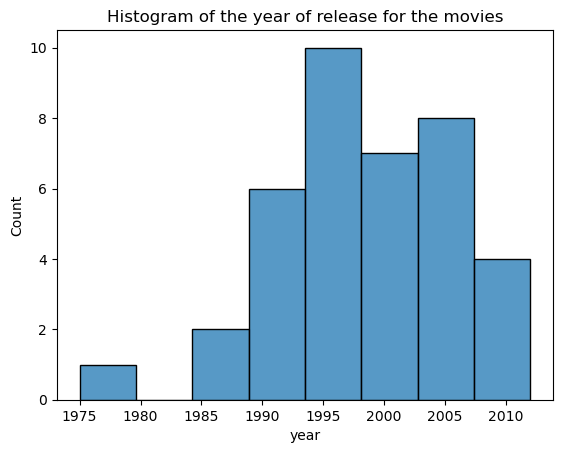

In [35]:
query = """ MATCH (m:Movie) RETURN m.released as year """
data = graph.run(query).to_data_frame()
ax = sns.histplot(data["year"])
ax.title.set_text("Histogram of the year of release for the movies")

8. Who are the 10 actors with the most movie played in


In [36]:
query = """ MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH a, count(m) as num_movies
RETURN a.name, num_movies
ORDER BY num_movies DESC
LIMIT 10 """

results = graph.run(query).to_data_frame()
print(results)

               a.name  num_movies
0           Tom Hanks          12
1        Keanu Reeves           7
2            Meg Ryan           5
3      Jack Nicholson           5
4        Hugo Weaving           5
5    Cuba Gooding Jr.           4
6         Kevin Bacon           3
7  Laurence Fishburne           3
8    Carrie-Anne Moss           3
9          Tom Cruise           3


9. Delete every movie made by a director of your choosing


In [37]:
query = """ MATCH (d:Person {name: 'Howard Deutch'})-[:DIRECTED]->(m:Movie)
DETACH DELETE m """

graph.run(query)

(No data)

10.  Give some statistics that you find interesting.


In [42]:
query = """MATCH (w:Person)-[:WROTE]->(m:Movie)
WITH w, count(m) AS num_wrote_movies
MATCH (w)-[:ACTED_IN]->(m)
WITH w, num_wrote_movies, count(distinct m) AS num_movies_with_actor_role
RETURN CASE 
    WHEN num_wrote_movies > 0 THEN toFloat(num_movies_with_actor_role) / num_wrote_movies 
    ELSE 0 
END AS proportion
        """

results1 = graph.run(query).to_data_frame()
print("Proportion of writers that also acted in the movie is", results1['proportion'][0])

Proportion of writers that also acted in the movie is 1.0


11. Who played the most movies with KR ?


In [45]:
query = """
        MATCH (k:Person {name: 'Keanu Reeves'})-[:ACTED_IN]->(m:Movie)<-[:ACTED_IN]-(a:Person)
        WHERE a <> k
        WITH a, count(distinct m) AS num_movies_with_keanu
        RETURN a.name AS actor, num_movies_with_keanu
        ORDER BY num_movies_with_keanu DESC
        LIMIT 1
        """

results2 = graph.run(query).to_data_frame()
print(results2)


          actor  num_movies_with_keanu
0  Hugo Weaving                      3


La personne qui a le plus joué dans un film avec KR est Hugo Weaving avec trois apparitions ensemble.